In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

Recall that in PHYS 207, you were often asked to plot displacement as a function of time. For example, for a baseball thrown directly upward you would plot $y(t)$, and for a block on a horizontal spring you would plot $x(t)$. Here we will examine how the displacement and time axes "scissor together" at relativistic speeds.

The convention in relativity is to reverse the axes: $ct$ is vertical and $x$ is horizontal. Time moves forward from the bottom to the top of the plot:

(-1.0, 1.0, -1.0, 1.0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


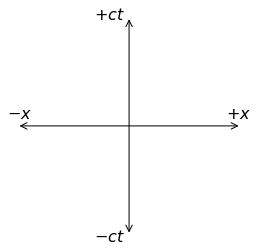

In [3]:
plt.figure(figsize=(4,4))
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.annotate(text='', xy=(-1,0), xytext=(1,0), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='', xy=(0,-1), xytext=(0,1), arrowprops=dict(arrowstyle='<->'))
plt.text(0.98, 0.04, r"$+x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.98, 0.04, r"$-x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.04, 1.02, r"$+ct$", horizontalalignment='right', verticalalignment='center')
plt.text(-0.04, -1.02, r"$-ct$", horizontalalignment='right', verticalalignment='center')
plt.axis('off')

Imagine that frame $K^{\prime}$ is moving in the $+x$ direction at speed $v$ relative to frame $K$. You are at rest in frame $K$. Let's figure out how the set of $(x^{\prime}, ct^{\prime})$ axes would look to you when the frames' origins $O$ and $O^{\prime}$ coincide.

<ol>
    <li>Use the fact that $x^{\prime} = 0$ on the $ct^{\prime}$ axis to define a line $ct(x)$ in frame $K$ that follows the $ct^{\prime}$ axis. Write a function that computes points on the line. $v$ will be one of your function inputs.</li>
</ol>

In [4]:
def ct_prime_axis(x, v):
    #From x' = 0 = γ(x - vt), we get x = vt, so ct = x/v
    #To make this easier I'm just making v the a fraction of c as the input 
    return x/v

<ol start=2>
    <li>Use the fact that $ct^{\prime} = 0$ on the $x^{\prime}$ axis to define a line $ct(x)$ that traces the $x^{\prime}$ axis in frame $K$. Write a second function that computes points on this line.</li>
</ol>

In [5]:
def x_prime_axis(x, v):
    '''
    # From ct' = 0 = γ(ct - vx/c), we get ct = vx/c
    
    To make this easier I'm just making v the a fraction of c as the input
    I guess Beta would be the more correct variable but I'm just keeping it
    v I hope thats not too confusing
    '''
    return v*x

<ol start=3>
    <li>The code below creates a figure with centered $(x, ct)$ axes that have range $(-10^{10}, 10^{10})$ m. We are using $ct$ instead of just $t$ on our vertical axis so that both axes have the same units. Use your functions from problems 1 and 2 to overplot the $ct^{\prime}$ and $x^{\prime}$ axes <strong>as a function of $x$</strong> for $v = 0.2c$. Make your $ct^{\prime}$ and $x^{\prime}$ axes red, and label them in red. Also add black labels to the $(x, ct)$ axes giving the coordinate name ($x$ or $ct$) and the units.</li>
</ol>

Text(10500000000.0, 2600000000.0, "$x'$ (m)")

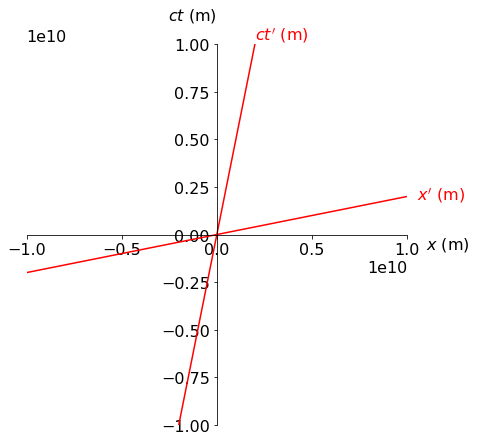

In [23]:
# Set up an array of independent variables x that spans (-1e10, 1e10) m
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the ct' and x' axes below
v = 0.2  # velocity as a fraction of c
ax.plot(x, ct_prime_axis(x, v), 'r-')  
ax.plot(x, x_prime_axis(x, v), 'r-')   

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,ct) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add labels to the axes
# K labels
ax.text(1.33e10, 0, "$x$ (m)", ha='right', va='top')
ax.text(0, 1.2e10, "$ct$ (m)", ha='right', va='top')

#K' labels
ax.text(0.2e10, ct_prime_axis(0.2e10, v), "$ct'$ (m)", color='red', ha='left', va='bottom')
ax.text(1.05e10, x_prime_axis(1.3e10, v), "$x'$ (m)", color='red', ha='left', va='top')

<ol start=4>
    <li>Make a figure that plots $ct^{\prime}$ and $x^{\prime}$ axes for $v = 0.25c$, $v = 0.5c$, and $v = 0.75c$. Use different colors for each pair of axes. Make a legend that shows which value of $v$ corresponds to each color. Label the $(x, ct)$ axes and add units.</li>
</ol>

Text(0, 12000000000.0, '$ct$ (m)')

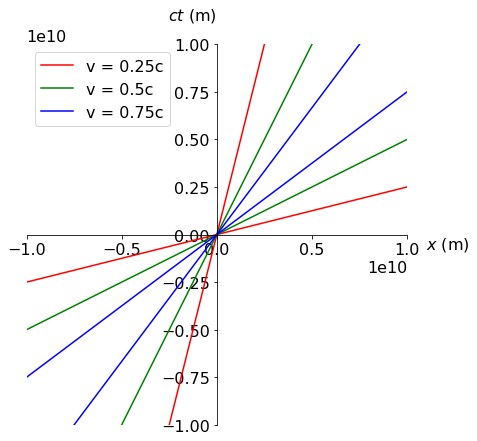

In [26]:
# Set up an array of independent variables x that spans (-1e10, 1e10) m
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))



velocities = [0.25, 0.5, 0.75]
colors = ['red', 'green', 'blue']

for i, v in enumerate(velocities):
    ax.plot(x, ct_prime_axis(x, v), color=colors[i], label=f"v = {v}c")
    ax.plot(x, x_prime_axis(x, v), color=colors[i])

# Add a legend
ax.legend()

# Move the left and bottom "spines" (borders of the plot) to the center
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

#K labels
ax.text(1.33e10, 0, "$x$ (m)", ha='right', va='top')
ax.text(0, 1.2e10, "$ct$ (m)", ha='right', va='top')

<ol start=5>
    <li>Connect your graph from problem 4 with the discussion of world lines in Chapter 2 of your textbook. What kind of world line do your $(x^{\prime}, ct^{\prime})$ axes approach as $v \rightarrow c$? Create a similar plot to problem 4, but this time plot $(x^{\prime}, ct^{\prime})$ axes for $v = 0.5, 0.75, 0.875, 0.9375$. To illustrate the concept of taking a limit as $v \rightarrow c$, make each set of $( x^{\prime}, ct^{\prime})$ axes a successively darker shade of gray. Plot the limiting world line in black. Add a legend to show which value of $v$ corresponds to which shade of gray. You may find it helpful to specify line colors like this: <tt>color='0.7'</tt>.</li>
</ol>

Text(0, 9000000000.0, '$ct$ (m)')

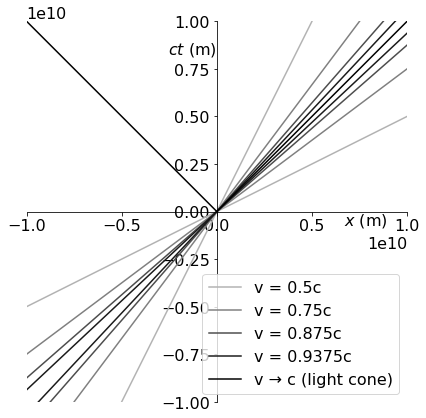

In [27]:
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10


fig, ax = plt.subplots(figsize=(7,7))


velocities = [0.5, 0.75, 0.875, 0.9375]
grays = ['0.7', '0.5', '0.3', '0.1']  
for i, v in enumerate(velocities):
    ax.plot(x, ct_prime_axis(x, v), color=grays[i], label=f"v = {v}c")
    ax.plot(x, x_prime_axis(x, v), color=grays[i])

#World line limit 
ax.plot(x, np.abs(x), 'k-', label="v → c (Limit)")


ax.legend()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

#K labels
ax.text(1.33e10, 0, "$x$ (m)", ha='right', va='top')
ax.text(0, 1.2e10, "$ct$ (m)", ha='right', va='top')